# SAMPLING ASSIGNMENT
## Shivam Dhiman  (102116113)


---

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
sns.set_palette("flare")
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_validate
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier, AdaBoostClassifier, HistGradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!wget https://raw.githubusercontent.com/AnjulaMehto/Sampling_Assignment/main/Creditcard_data.csv

--2024-01-29 04:54:31--  https://raw.githubusercontent.com/AnjulaMehto/Sampling_Assignment/main/Creditcard_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 276637 (270K) [text/plain]
Saving to: ‘Creditcard_data.csv’

Creditcard_data.csv 100%[===================>] 270.15K  --.-KB/s    in 0.01s   

2024-01-29 04:54:31 (23.3 MB/s) - ‘Creditcard_data.csv’ saved [276637/276637]



In [ ]:
data = pd.read_csv("/content/Creditcard_data.csv")
data.drop(["Time"],axis=1,inplace=True)

X = data.drop(["Class"],axis=1)
y = data["Class"]

data.head(20)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


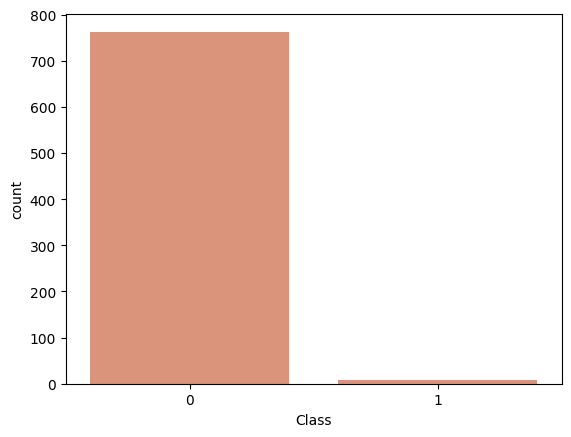

In [ ]:
sns.countplot(x=y);

# Sampling (Over & Under)

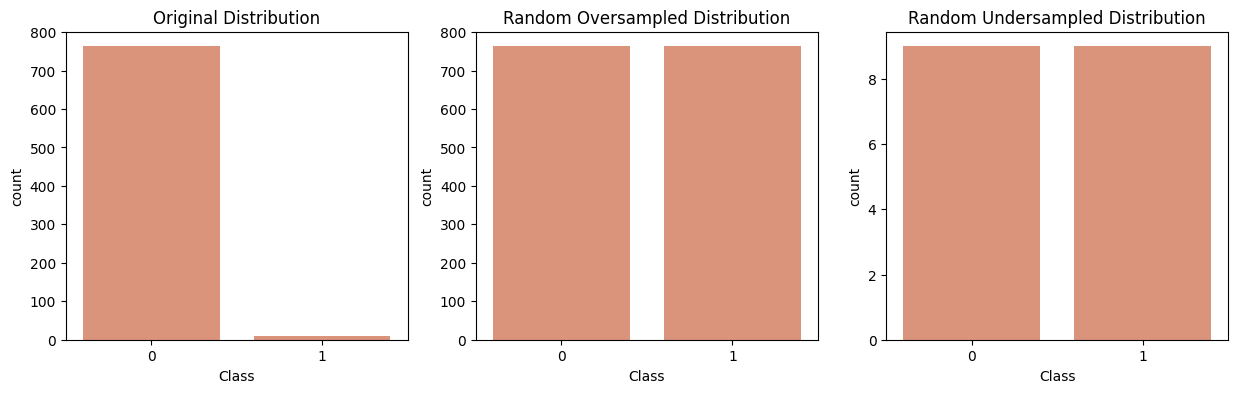

In [ ]:
X_over1, y_over1 = RandomOverSampler().fit_resample(X, y)
X_over2, y_over2 = SMOTE().fit_resample(X, y)
X_over3, y_over3 = ADASYN().fit_resample(X, y)

X_under, y_under = RandomUnderSampler().fit_resample(X, y)


plt.subplots(1,3,figsize=(15,4))
plt.subplot(1,3,1)
sns.countplot(x=y);
plt.title("Original Distribution")

plt.subplot(1,3,2);
sns.countplot(x=y_over1);
plt.title("Random Oversampled Distribution")

plt.subplot(1,3,3);
sns.countplot(x=y_under);
plt.title("Random Undersampled Distribution")
plt.show();

# Training Models

In [ ]:
rf = RandomForestClassifier()
knn = KNeighborsClassifier()
xgb = XGBClassifier()
lgbm = LGBMClassifier(verbose=-1)
gb = GradientBoostingClassifier()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

rf.fit(X_train,y_train)
knn.fit(X_train,y_train)
gb.fit(X_train,y_train)
xgb.fit(X_train,y_train)
lgbm.fit(X_train,y_train)

print("\n","-"*30)
print("Accuracy of RF Original:",accuracy_score(rf.predict(X_test),y_test))
print("Accuracy of KNN Original:",accuracy_score(knn.predict(X_test),y_test))
print("Accuracy of GB Original:",accuracy_score(gb.predict(X_test),y_test))
print("Accuracy of XGB Original:",accuracy_score(xgb.predict(X_test),y_test))
print("Accuracy of LGBM Original:",accuracy_score(lgbm.predict(X_test),y_test))

X_train, X_test, y_train, y_test = train_test_split(X_over1,y_over1, test_size=0.3)

rf.fit(X_train,y_train)
knn.fit(X_train,y_train)
gb.fit(X_train,y_train)
xgb.fit(X_train,y_train)
lgbm.fit(X_train,y_train)

print("\n","-"*30)
print("Accuracy of RF RANDOM OVERSAMPLED:",accuracy_score(rf.predict(X_test),y_test))
print("Accuracy of KNN RANDOM OVERSAMPLED:",accuracy_score(knn.predict(X_test),y_test))
print("Accuracy of GB RANDOM OVERSAMPLED:",accuracy_score(gb.predict(X_test),y_test))
print("Accuracy of XGB RANDOM OVERSAMPLED:",accuracy_score(xgb.predict(X_test),y_test))
print("Accuracy of LGBM RANDOM OVERSAMPLED:",accuracy_score(lgbm.predict(X_test),y_test))


X_train, X_test, y_train, y_test = train_test_split(X_over2,y_over2, test_size=0.3)

rf.fit(X_train,y_train)
knn.fit(X_train,y_train)
gb.fit(X_train,y_train)
xgb.fit(X_train,y_train)
lgbm.fit(X_train,y_train)

print("\n","-"*30)
print("Accuracy of RF SMOTE OVERSAMPLED:",accuracy_score(rf.predict(X_test),y_test))
print("Accuracy of KNN SMOTE OVERSAMPLED:",accuracy_score(knn.predict(X_test),y_test))
print("Accuracy of GB SMOTE OVERSAMPLED:",accuracy_score(gb.predict(X_test),y_test))
print("Accuracy of XGB SMOTE OVERSAMPLED:",accuracy_score(xgb.predict(X_test),y_test))
print("Accuracy of LGBM SMOTE OVERSAMPLED:",accuracy_score(lgbm.predict(X_test),y_test))


X_train, X_test, y_train, y_test = train_test_split(X_over3,y_over3, test_size=0.3)

rf.fit(X_train,y_train)
knn.fit(X_train,y_train)
gb.fit(X_train,y_train)
xgb.fit(X_train,y_train)
lgbm.fit(X_train,y_train)

print("\n","-"*30)
print("Accuracy of RF ADASYN OVERSAMPLED:",accuracy_score(rf.predict(X_test),y_test))
print("Accuracy of KNN ADASYN OVERSAMPLED:",accuracy_score(knn.predict(X_test),y_test))
print("Accuracy of GB ADASYN OVERSAMPLED:",accuracy_score(gb.predict(X_test),y_test))
print("Accuracy of XGB ADASYN OVERSAMPLED:",accuracy_score(xgb.predict(X_test),y_test))
print("Accuracy of LGBM ADASYN OVERSAMPLED:",accuracy_score(lgbm.predict(X_test),y_test))

X_train, X_test, y_train, y_test = train_test_split(X_under,y_under, test_size=0.3)

rf.fit(X_train,y_train)
knn.fit(X_train,y_train)
gb.fit(X_train,y_train)
xgb.fit(X_train,y_train)
lgbm.fit(X_train,y_train)

print("\n","-"*30)
print("Accuracy of RF RANDOM UNDERSAMPLED:",accuracy_score(rf.predict(X_test),y_test))
print("Accuracy of KNN RANDOM UNDERSAMPLED:",accuracy_score(knn.predict(X_test),y_test))
print("Accuracy of GB RANDOM UNDERSAMPLED:",accuracy_score(gb.predict(X_test),y_test))
print("Accuracy of XGB RANDOM UNDERSAMPLED:",accuracy_score(xgb.predict(X_test),y_test))
print("Accuracy of LGBM RANDOM UNDERSAMPLED:",accuracy_score(lgbm.predict(X_test),y_test))



 ------------------------------
Accuracy of RF Original: 0.9741379310344828
Accuracy of KNN Original: 0.9741379310344828
Accuracy of GB Original: 0.9655172413793104
Accuracy of XGB Original: 0.9741379310344828
Accuracy of LGBM Original: 0.978448275862069

 ------------------------------
Accuracy of RF RANDOM OVERSAMPLED: 1.0
Accuracy of KNN RANDOM OVERSAMPLED: 0.962882096069869
Accuracy of GB RANDOM OVERSAMPLED: 0.9956331877729258
Accuracy of XGB RANDOM OVERSAMPLED: 0.9912663755458515
Accuracy of LGBM RANDOM OVERSAMPLED: 1.0

 ------------------------------
Accuracy of RF SMOTE OVERSAMPLED: 0.9956331877729258
Accuracy of KNN SMOTE OVERSAMPLED: 0.9235807860262009
Accuracy of GB SMOTE OVERSAMPLED: 0.9956331877729258
Accuracy of XGB SMOTE OVERSAMPLED: 1.0
Accuracy of LGBM SMOTE OVERSAMPLED: 0.9934497816593887

 ------------------------------
Accuracy of RF ADASYN OVERSAMPLED: 0.9934640522875817
Accuracy of KNN ADASYN OVERSAMPLED: 0.8954248366013072
Accuracy of GB ADASYN OVERSAMPLED: 0.98